In [1]:
import yfinance as yf
import pandas as pd
import numpy as np

# Downloading AAPL stock data
aapl_data = yf.download('AAPL', start='2013-01-01')

aapl_data.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769089,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557434,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096226,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001551,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044609,458707200


In [4]:
# Calculate daily returns
aapl_data['Daily Return'] = aapl_data['Adj Close'].pct_change()

# Assuming a risk-free rate (e.g., return on short-term government bonds)
risk_free_rate = 0.03  # Modify as needed

# Calculate excess returns over the risk-free rate
aapl_data['Excess Return'] = aapl_data['Daily Return'] - risk_free_rate / 252  # Assuming 252 trading days in a year

# Mean and variance of excess returns
mean_excess_return = aapl_data['Excess Return'].mean()
variance_excess_return = aapl_data['Excess Return'].var()

# Kelly Criterion Calculation
kelly_fraction = mean_excess_return / variance_excess_return

print(f"Optimal fraction based on Kelly Criterion: {kelly_fraction}")

Optimal fraction based on Kelly Criterion: 2.923901015988702


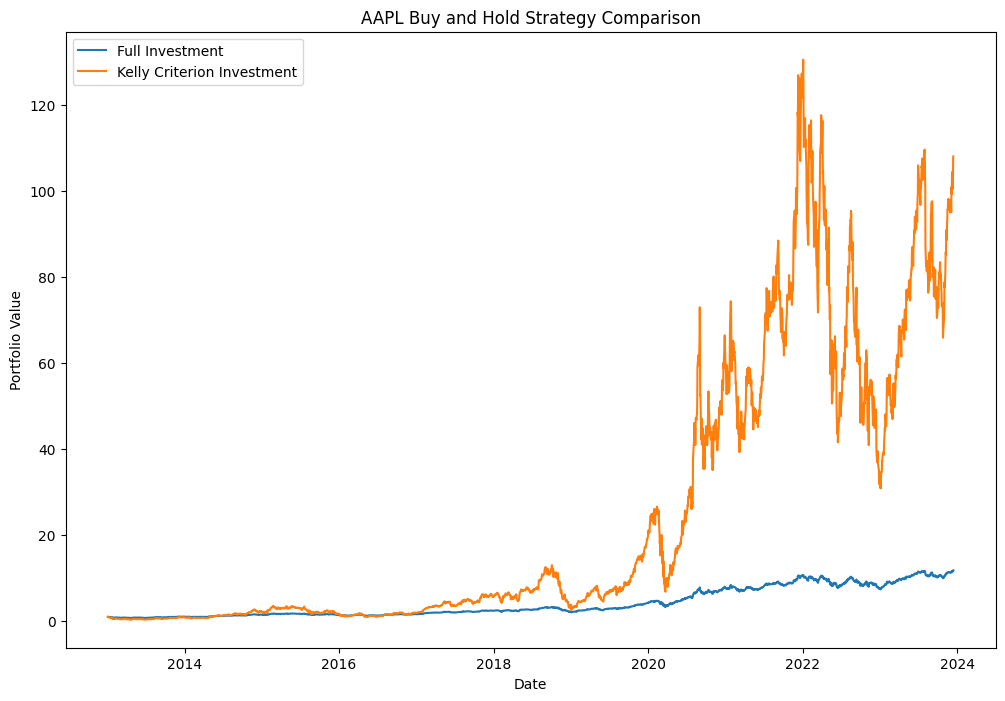

In [5]:
import matplotlib.pyplot as plt

# Buy and hold with full investment
aapl_data['Full Investment'] = (1 + aapl_data['Daily Return']).cumprod()

# Buy and hold with Kelly Criterion investment
aapl_data['Kelly Investment'] = (1 + kelly_fraction * aapl_data['Daily Return']).cumprod()

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(aapl_data['Full Investment'], label='Full Investment')
plt.plot(aapl_data['Kelly Investment'], label='Kelly Criterion Investment')
plt.title('AAPL Buy and Hold Strategy Comparison')
plt.xlabel('Date')
plt.ylabel('Portfolio Value')
plt.legend()
plt.show()